импортируем библиотеки

In [2]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Загрузим датасет.

In [3]:
from pathlib import Path

DIR = Path.cwd()
BASE_DIR = DIR.resolve().parents[1]
DATASET_PATH = BASE_DIR / "seminars" / "S05" / "S05-hw-dataset.csv"


data = pd.DataFrame(pd.read_csv(DATASET_PATH))
data.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [13]:
data.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [12]:
datanorm = data['default'].value_counts(normalize=True)
datanorm.head()

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Явных аномалий не выявлено: все значения признаков находятся в реалистичных пределах. Таргет распределён относительно сбалансированно: 59% объектов с классом 0 (не дефолт) и 41% с классом 1 (дефолт).

 Выделим матрицу признаков `X` и вектор таргета `y`

In [4]:
Y = data['default']
X = data.drop(columns=['default', 'client_id'])

 Разделим данные на обучающую и тестовую выборки

In [5]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

Построим модель

In [9]:
model = DummyClassifier(strategy='most_frequent')
model.fit(Train_X, Train_Y)

,"strategy strategy: {""most_frequent"", ""prior"", ""stratified"", ""uniform"", ""constant""}, default=""prior""Strategy to use to generate predictions.* ""most_frequent"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit`. The `predict_proba` method returns the matching one-hot encoded vector.* ""prior"": the `predict` method always returns the most frequent class label in the observed `y` argument passed to `fit` (like ""most_frequent""). ``predict_proba`` always returns the empirical class distribution of `y` also known as the empirical class prior distribution.* ""stratified"": the `predict_proba` method randomly samples one-hot vectors from a multinomial distribution parametrized by the empirical class prior probabilities. The `predict` method returns the class label which got probability one in the one-hot vector of `predict_proba`. Each sampled row of both methods is therefore independent and identically distributed.* ""uniform"": generates predictions uniformly at random from the list of unique classes observed in `y`, i.e. each class has equal probability.* ""constant"": always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class. .. versionchanged:: 0.24 The default value of `strategy` has changed to ""prior"" in version 0.24.",'most_frequent'
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness to generate the predictions when``strategy='stratified'`` or ``strategy='uniform'``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None
,"constant constant: int or str or array-like of shape (n_outputs,), default=NoneThe explicit constant as predicted by the ""constant"" strategy. Thisparameter is useful only for the ""constant"" strategy.",None


Проверим точность нашей модели

In [6]:
model = LogisticRegression()
model.fit(Train_X, Train_Y)

accuracy = accuracy_score(Test_Y, model.predict(Test_X))
roc_auc = roc_auc_score(Test_Y, model.predict_proba(Test_X)[:,1])

c:\Users\kloch\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
accuracy

0.6566666666666666

In [8]:
roc_auc

0.6679412980570483

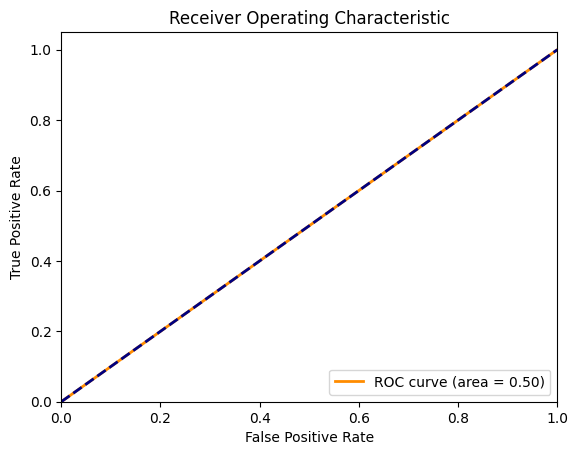

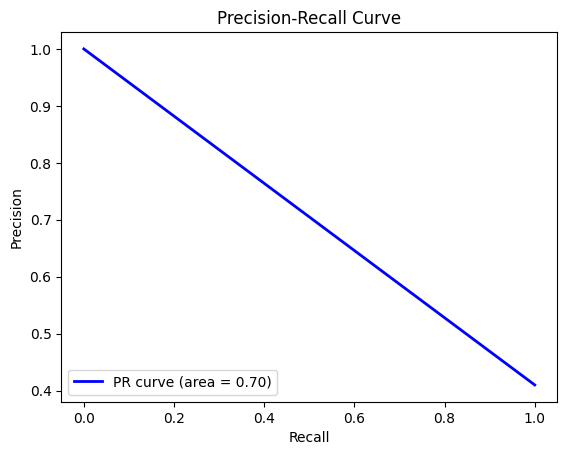

In [10]:
# ROC Curve
fpr, tpr, _ = roc_curve(Test_Y, model.predict_proba(Test_X)[:,1])
roc_auc_val = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('figures/roc_curve.png')
plt.show()

# PR Curve
precision, recall, _ = precision_recall_curve(Test_Y, model.predict_proba(Test_X)[:,1])
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.savefig('figures/pr_curve.png')
plt.show()

DummyClassifier с стратегией 'most_frequent' всегда предсказывает наиболее частый класс (0, "не дефолт"), игнорируя признаки. Метрики на тестовой выборке: accuracy = 0.59 (доля большинства класса), ROC-AUC = 0.5 (уровень случайного угадывания). Важность бейзлайна в том, что он служит точкой отсчёта для оценки качества более сложных моделей, подтверждая, что они превосходят тривиальное предсказание и действительно используют данные.

In [22]:
pipe = Pipeline([
       ("scaler", StandardScaler()),
       ("logreg", LogisticRegression(max_iter=1000))
   ])

Используем GridSearchCV с кросс-валидацией (cv=5) и scoring='roc_auc' для оптимизации по ROC-AUC. Пробуем C = [0.01, 0.1, 1.0, 10.0] — типичный диапазон, покрывающий слабую и сильную регуляризацию.

In [40]:
param_grid = {'logreg__C': [0.01, 0.1, 1.0, 10.0]}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
grid.fit(Train_X, Train_Y)
best_model = grid.best_estimator_
print("Лучший параметр C:", grid.best_params_)

Лучший параметр C: {'logreg__C': 0.1}


In [42]:
pred = best_model.predict(Test_X)
proba = best_model.predict_proba(Test_X)[:, 1]
accuracy = accuracy_score(Test_Y, pred)
roc_auc = roc_auc_score(Test_Y, proba)

print(f"Accuracy: {accuracy:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")


Accuracy: 0.803
ROC-AUC: 0.875


In [45]:
results = pd.DataFrame({
    'Model': ['Dummy (Baseline)', 'LogisticRegression'],
    'Accuracy': [0.590, 0.803],
    'ROC-AUC': [0.500, 0.875],
})

print("Сравнение моделей:")
print(results.to_string(index=False))

Сравнение моделей:
             Model  Accuracy  ROC-AUC
  Dummy (Baseline)     0.590    0.500
LogisticRegression     0.803    0.875


### Краткий отчёт по результатам

Бейзлайн-модель (DummyClassifier) всегда предсказывает наиболее частый класс (0), игнорируя признаки, что даёт низкое качество: accuracy 0.59 и ROC-AUC 0.5, соответствующие случайному угадыванию. Логистическая регрессия с оптимизированным параметром C=0.1 значительно превосходит бейзлайн, показывая accuracy 0.803 (рост на ~0.21) и ROC-AUC 0.875 (рост на 0.375), что указывает на эффективное использование данных для предсказания дефолтов.

Изменение регуляризации C влияло на качество: при C=0.01 (сильная регуляризация) модель недообучалась, при C=10.0 (слабая) — могла переобучаться, а оптимальный C=0.1 обеспечил лучший ROC-AUC.

Для этой задачи  логистическая регрессия кажется разумной моделью, так как она устойчива к шуму и даёт хорошие метрики без переобучения. Dummy-модель подходит только как бейзлайн для сравнения. 